### Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [593]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [596]:
data = pd.read_csv('data/coupons.csv')

In [598]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [601]:
# dimensionality reduction
data_new = data[['passanger', 'temperature', 'coupon', 'age', 'income', 'Bar', 'CoffeeHouse', 'CarryAway', 'direction_same', 'direction_opp', 'Y']]

# clean age column and convert to float
data_new['age'] = data_new.age.str.replace("below", "")
data_new['age'] = data_new.age.str.replace("plus", "")
data_new['age'] = data_new.age.astype(float)

/var/folders/7x/1byzqctx52x_jf8cxl6mv5lw0000gp/T/ipykernel_10438/28864789.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['age'] = data_new.age.str.replace("below", "")
/var/folders/7x/1byzqctx52x_jf8cxl6mv5lw0000gp/T/ipykernel_10438/28864789.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['age'] = data_new.age.str.replace("plus", "")
/var/folders/7x/1byzqctx52x_jf8cxl6mv5lw0000gp/T/ipykernel_10438/28864789.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

3. Decide what to do about your missing data -- drop, replace, other...

In [604]:
# drop rows with missing data
data_new.dropna()

,passanger,temperature,coupon,age,income,Bar,CoffeeHouse,CarryAway,direction_same,direction_opp,Y
22,Alone,55,Restaurant(<20),21.0,$62500 - $74999,never,less1,4~8,0,1,1
23,Friend(s),80,Coffee House,21.0,$62500 - $74999,never,less1,4~8,0,1,0
24,Friend(s),80,Bar,21.0,$62500 - $74999,never,less1,4~8,0,1,1
25,Friend(s),80,Carry out & Take away,21.0,$62500 - $74999,never,less1,4~8,0,1,0
26,Friend(s),80,Coffee House,21.0,$62500 - $74999,never,less1,4~8,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
12679,Partner,55,Carry out & Take away,26.0,$75000 - $87499,never,never,1~3,1,0,1
12680,Alone,55,Carry out & Take away,26.0,$75000 - $87499,never,never,1~3,0,1,1
12681,Alone,30,Coffee House,26.0,$75000 - $87499,never,never,1~3,1,0,0
12682,Alone,30,Bar,26.0,$75000 - $87499,never,never,1~3,0,1,0


4. What proportion of the total observations chose to accept the coupon?



In [607]:
# get total acceptance rate; number of accepted coupons / total coupons offered * 100%
total_acceptance_rate = data_new['Y'].sum() / data_new['Y'].count() * 100
print("Total acceptance rate = {tar}%".format(tar = round(total_acceptance_rate, 2)))

Total acceptance rate = 56.84%


5. Use a bar plot to visualize the `coupon` column.

<Axes: ylabel='coupon'>

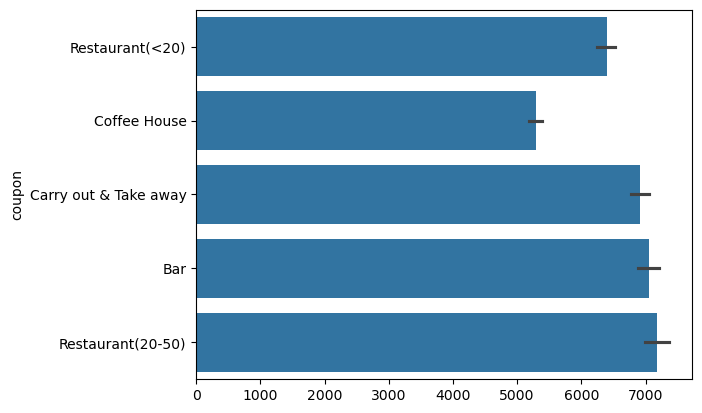

In [610]:
sns.barplot(data_new['coupon'])

6. Use a histogram to visualize the temperature column.

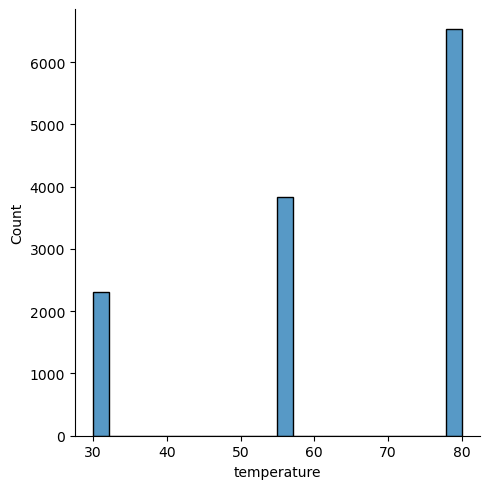

In [613]:
sns.displot(data_new, x = 'temperature')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.

In [616]:
bar_data = data_new.query("coupon == 'Bar'")

2. What proportion of bar coupons were accepted?


In [619]:
bar_acceptance_rate = bar_data['Y'].sum() / bar_data['Y'].count() * 100
print("Bar acceptance rate = {bar}%".format(bar = round(bar_acceptance_rate, 2)))

Bar acceptance rate = 41.0%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


Acceptance rate for those who went to a bar 3 or fewer times a month: 37.06%
Acceptance rate for those who went to a bar more than 3 times a month: 76.88%


/var/folders/7x/1byzqctx52x_jf8cxl6mv5lw0000gp/T/ipykernel_10438/240907478.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_data['Bar'] = pd.Categorical(bar_data['Bar'], ["never", "less1", "1~3", "4~8", "gt8"])


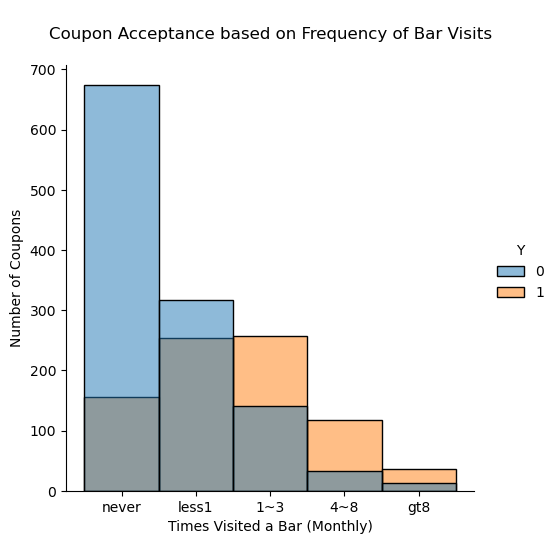

In [622]:
# get relevant conditional values
bar_cond_3_or_fewer = ["never", "less1", "1~3"] 
bar_cond_more_than_3 = ["4~8", "gt8"]

# write corresponding queries
bar_3_or_fewer = bar_data.query("Bar in @bar_cond_3_or_fewer")
bar_more_than_3 = bar_data.query("Bar in @bar_cond_more_than_3")

# find acceptance rates
bar_3_or_fewer_acceptance_rate = bar_3_or_fewer['Y'].sum() / bar_3_or_fewer['Y'].count() * 100
bar_more_than_3_acceptance_rate = bar_more_than_3['Y'].sum() / bar_more_than_3['Y'].count() * 100

# print results
print("Acceptance rate for those who went to a bar 3 or fewer times a month: {acceptance_rate}%".format(acceptance_rate = round(bar_3_or_fewer_acceptance_rate, 2)))
print("Acceptance rate for those who went to a bar more than 3 times a month: {acceptance_rate}%".format(acceptance_rate = round(bar_more_than_3_acceptance_rate, 2)))

# set x-label order and create a histogram to visualize acceptance rate based on frequency of bar visits per month
bar_data['Bar'] = pd.Categorical(bar_data['Bar'], ["never", "less1", "1~3", "4~8", "gt8"])

ax = sns.displot(bar_data, x = 'Bar', hue = 'Y')
plt.title("\nCoupon Acceptance based on Frequency of Bar Visits\n") 
plt.xlabel("Times Visited a Bar (Monthly)")
plt.ylabel("Number of Coupons")
ax.figure.savefig("images/Bar_Hist.png")

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to all the others.  Is there a difference?


Acceptance rate for drivers who visit a bar more than once a month and are over the age of 25: 69.52%
Acceptance rate for all other drivers: 33.42%


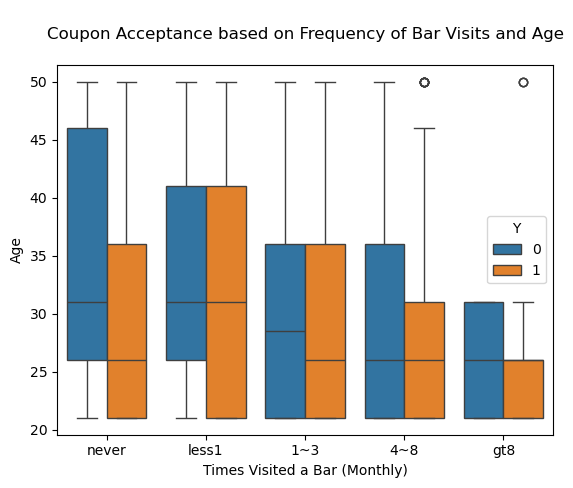

In [625]:
# get relevant conditional values
bar_cond_more_than_once = ["1~3", "4~8", "gt8"]
bar_cond_1_or_less = ["never", "less1"] 

# write corresponding queries
bar_more_than_once_over_25 = bar_data.query("Bar in @bar_cond_more_than_once and age > 25")
bar_1_or_less_25_under = bar_data.query("Bar in @bar_cond_1_or_less or age <= 25")

# find acceptance rates
bar_more_than_once_over_25_acceptance_rate = bar_more_than_once_over_25['Y'].sum() / bar_more_than_once_over_25['Y'].count() * 100
bar_1_or_less_25_under_acceptance_rate = bar_1_or_less_25_under['Y'].sum() / bar_1_or_less_25_under['Y'].count() * 100

# print results
print("Acceptance rate for drivers who visit a bar more than once a month and are over the age of 25: {acceptance_rate}%".format(acceptance_rate = round(bar_more_than_once_over_25_acceptance_rate, 2)))
print("Acceptance rate for all other drivers: {acceptance_rate}%".format(acceptance_rate = round(bar_1_or_less_25_under_acceptance_rate, 2)))

# create a histogram to visualize acceptance rate based on frequency of bar visits per month and age
ax = sns.boxplot(bar_data, x = 'Bar', y = 'age', hue = 'Y')
plt.title("\nCoupon Acceptance based on Frequency of Bar Visits and Age\n") 
plt.xlabel("Times Visited a Bar (Monthly)")
plt.ylabel("Age")
ax.figure.savefig("images/Bar_Box.png")

The difference is that drivers who go to a bar more than once a month and are over the age of 25 have a 36.1% higher bar coupon acceptance rate than all other drivers. 

5.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

- I hypothesize that drivers who visit a bar more than once a month have a higher chance of accepting a coupon because, as depicted in the first histogram, a greater number of monthly bar visits yields a larger proportion of coupons accepted.

- The boxplot reveals that the median age for accepted coupons of drivers visiting a bar less than once a month is lower than the median age of rejected coupons for the same group on average. This means drivers closer to 25 who visit a bar less than once a month are more likely to accept a coupon than drivers older than 25. In contrast, the median age of accepted coupons for drivers who visit a bar more than once a month is higher than 25 and the number of accepted coupons is more proportionate in general.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

**Investigating the Coffee House Coupons**

1. Firstly, a `DataFrame` containing only information relevant to coffee house coupons will be created.

In [632]:
coffee_house_data = data_new.query("coupon == 'Coffee House'")

2. Determine the proportion of coffee house coupons that were accepted

In [650]:
coffee_house_acceptance_rate = coffee_house_data['Y'].sum() / coffee_house_data['Y'].count() * 100
print("Coffee house acceptance rate = {char}%".format(char = round(coffee_house_acceptance_rate, 2)))

Coffee house acceptance rate = 49.92%


3. **Problem A:** compare the acceptance rate between those with an annual income of less than $50,000 to those who have more 

Acceptance rate for those with an annual income below $50,000: 52.25%
Acceptance rate for those with an annual income of $50,000 or more: 47.26%


/var/folders/7x/1byzqctx52x_jf8cxl6mv5lw0000gp/T/ipykernel_10438/3745212405.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coffee_house_data['income'] = pd.Categorical(coffee_house_data['income'], ["Less than $12500", "$12500 - $24999", "$25000 - $37499", "$37500 - $49999", "$50000 - $62499", "$62500 - $74999", "$75000 - $87499", "$87500 - $99999", "$100000 or More"])


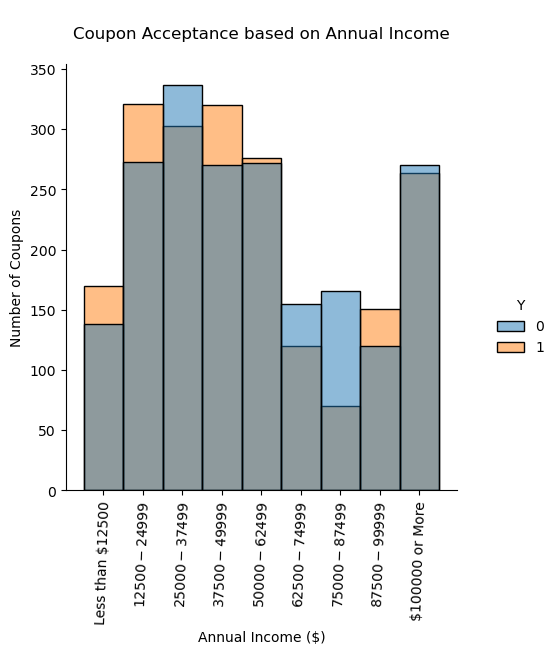

In [642]:
# get relevant conditional values
coffee_house_cond_less_than_50k = ["Less than $12500", "$12500 - $24999", "$25000 - $37499", "$37500 - $49999"] 
coffee_house_cond_50k_or_more = ["$50000 - $62499", "$62500 - $74999", "$75000 - $87499", "$87500 - $99999", "$100000 or More"]

# write corresponding queries
coffee_house_less_than_50k = coffee_house_data.query("income in @coffee_house_cond_less_than_50k")
coffee_house_50k_or_more = coffee_house_data.query("income in @coffee_house_cond_50k_or_more")

# find acceptance rates
coffee_house_less_than_50k_acceptance_rate = coffee_house_less_than_50k['Y'].sum() / coffee_house_less_than_50k['Y'].count() * 100
coffee_house_50k_or_more_acceptance_rate = coffee_house_50k_or_more['Y'].sum() / coffee_house_50k_or_more['Y'].count() * 100

# print results
print("Acceptance rate for those with an annual income below $50,000: {acceptance_rate}%".format(acceptance_rate = round(coffee_house_less_than_50k_acceptance_rate, 2)))
print("Acceptance rate for those with an annual income of $50,000 or more: {acceptance_rate}%".format(acceptance_rate = round(coffee_house_50k_or_more_acceptance_rate, 2)))

# set x_label order and create a histogram to visualize acceptance rate based on annual income
coffee_house_data['income'] = pd.Categorical(coffee_house_data['income'], ["Less than $12500", "$12500 - $24999", "$25000 - $37499", "$37500 - $49999", "$50000 - $62499", "$62500 - $74999", "$75000 - $87499", "$87500 - $99999", "$100000 or More"])

ax = sns.displot(coffee_house_data, x = 'income', hue = 'Y')
plt.title("\nCoupon Acceptance based on Annual Income\n") 
plt.xlabel("Annual Income ($)")
plt.ylabel("Number of Coupons")
plt.xticks(rotation=88)
ax.figure.savefig("images/Coffee_House_Hist.png")

**Observation A:** we see from the histogram above that drivers with an annual income of less than $50,000 comprise a higher proportion of accepted coffee house coupons compared to those with a greater income.    

4. **Problem B:** compare the acceptance rate between drivers with an annual income of less than $50,000 and are under the age of 30 to all the others

Acceptance rate for drivers with an income of less than $50,000 and are under the age of 30: 50.28%
Acceptance rate for all other drivers: 37.64%


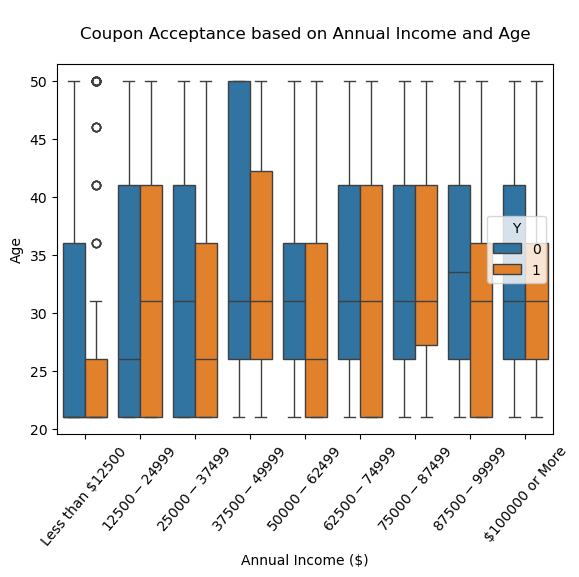

In [654]:
# write corresponding queries
coffee_house_less_than_50k_under_30 = bar_data.query("income in @coffee_house_cond_less_than_50k and age < 30")
coffee_house_50k_or_more_30_over = bar_data.query("income in @coffee_house_cond_50k_or_more or age >= 30")

# find acceptance rates
coffee_house_less_than_50k_under_30_acceptance_rate = coffee_house_less_than_50k_under_30['Y'].sum() / coffee_house_less_than_50k_under_30['Y'].count() * 100
coffee_house_50k_or_more_30_over_acceptance_rate = coffee_house_50k_or_more_30_over['Y'].sum() / coffee_house_50k_or_more_30_over['Y'].count() * 100

# print results
print("Acceptance rate for drivers with an income of less than $50,000 and are under the age of 30: {acceptance_rate}%".format(acceptance_rate = round(coffee_house_less_than_50k_under_30_acceptance_rate, 2)))
print("Acceptance rate for all other drivers: {acceptance_rate}%".format(acceptance_rate = round(coffee_house_50k_or_more_30_over_acceptance_rate, 2)))

# create a histogram to visualize acceptance rate based on annual income and age
ax = sns.boxplot(coffee_house_data, x = 'income', y = 'age', hue = 'Y')
plt.title("\nCoupon Acceptance based on Annual Income and Age\n") 
plt.xlabel("Annual Income ($)")
plt.ylabel("Age")
plt.xticks(rotation=50)
ax.figure.savefig("images/Coffee_House_Box.png")

**Observation B:** this boxplot shows that the median age of accepted coupons for drivers with an annual income of less than $50,000 is lower than all other drivers on average. We can also see that the median age of accepted coupons for this group is lower than for drivers with a higher annual income and less proportionate in general.

5. **Hypothesis:** Based on these observations, I hypothesize that drivers with an annual income below $50,000 and under the age of 25 are the most likely to accept the coupon

6. **Next steps and recommendations**

- conduct further research to test the hypothesis
- if results are reproduced, distribute more coffee house coupons to drivers with annual income less than $50,000 and under the age of 25 
- if results are not reproduced, remodel the hypothesis by finding new problems and observations
- otherwise, determine if new coupon acceptance rate fits with hypothesis 